In [1]:
from constant import *
from unit import *

In [2]:
print(f"{NUM_MIDI_KEYS=}({MIN_MIDI_KEY} ~ {MAX_MIDI_KEY})")
print(f"{NUM_PITCH_CLASSES=}")

NUM_MIDI_KEYS=128(0 ~ 127)
NUM_PITCH_CLASSES=12


In [3]:
# correct case
note1 = MIDIUnit.new_note(1, 12.3)
note2 = MIDIUnit.new_note(10, 1.23)
note3 = MIDIUnit.new_note(100, 123)

print(note1, note1.is_note())        # Note(1, 12.30), True
print(MIDIRest, MIDIRest.is_note())  # Rest, False

Note(1, 12.30) True
Rest False


In [4]:
# error
error = MIDIUnit.new_note(1, -12.3)  # throw ValueError

ValueError: (midi_key=1, velocity=-12.30)

In [5]:
sequence1 = MIDIUnitSequence()
sequence1.append(note1)
sequence1.append(note2)
sequence1.append(note3)

sequence2 = MIDIUnitSequence()
sequence2.append(MIDIRest)

sequence3 = MIDIUnitSequence()
sequence3.append(note3)
sequence3.append(note2)
sequence3.append(note1)

print(sequence1)  # [Note(1, 12.30), Note(10, 1.23), Note(100, 123.00)]

[Note(1, 12.30), Note(10, 1.23), Note(100, 123.00)]


In [6]:
sequence_list = MIDIUnitSequenceList()
sequence_list.append(sequence1)
sequence_list.append(sequence2)
sequence_list.append(sequence3)

# [[Note(1, 12.30), Note(10, 1.23), Note(100, 123.00)], [Rest], [Note(1, 12.30), Note(10, 1.23), Note(100, 123.00)]]
print(sequence_list)

#  [[Rest], [Note(1, 12.30), Note(10, 1.23), Note(100, 123.00)]]
print(sequence_list[1:])

[[Note(1, 12.30), Note(10, 1.23), Note(100, 123.00)], [Rest], [Note(100, 123.00), Note(10, 1.23), Note(1, 12.30)]]
[[Rest], [Note(100, 123.00), Note(10, 1.23), Note(1, 12.30)]]


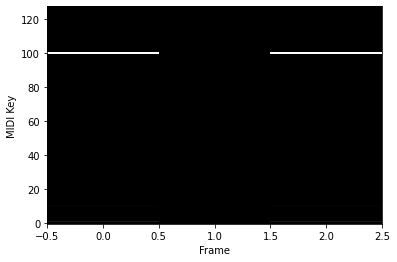

In [8]:
midi_matrix = sequence_list.to_midi_matrix(use_velocity=True)

import matplotlib.pyplot as plt
plt.imshow(midi_matrix, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
plt.ylabel("MIDI Key")
plt.xlabel("Frame")
plt.show()

In [9]:
new_sequence_list = MIDIUnitSequenceList.from_midi_matrix(midi_matrix)
print(new_sequence_list)

[[Note(1, 12.30), Note(10, 1.23), Note(100, 123.00)], [Rest], [Note(1, 12.30), Note(10, 1.23), Note(100, 123.00)]]


In [10]:
pitch_histogram = sequence_list.pitch_histogram
print(pitch_histogram)

[0.         0.0900901  0.         0.         0.9009009  0.
 0.         0.         0.         0.         0.00900901 0.        ]


In [13]:
sequence = sequence_list.repr_unit_sequence
print(sequence)

[Note(100, 123.00), Rest, Note(100, 123.00)]
